In [3]:
%matplotlib inline
import glob
import matplotlib
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf

tf.random.set_seed(0)
np.random.seed(0)

gpus = tf.config.experimental.list_physical_devices('GPU')

tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1400)]
)

logical_gpus = tf.config.experimental.list_logical_devices('GPU')

In [36]:
df = pd.read_excel('us_uninstall_20190831.xlsx').iloc[:, 1:2].values
df.shape

(699, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df_scaled = scaler.fit_transform(df)

c:\users\asus\tfgpu\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# 1 day prediction

In [14]:
feature_set = []
labels = []

for i in range(60, len(df)):
    feature_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i, 0])

In [35]:
feature_set, labels = np.array(feature_set), np.array(labels)
train, test = train_test_split(labels, test_size=0.3, random_state=20)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1))

In [23]:
from sklearn.model_selection import train_test_split
train_feature_set, test_feature_set, train_labels, test_labels =  train_test_split(feature_set, labels, test_size=0.3, random_state=20)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [25]:
model = Sequential()

model.add(LSTM(units=60, return_sequences=True, input_shape=(train_feature_set.shape[1], 1)))
model.add(Dropout(0.25))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(units=60, return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(units=60))
model.add(Dropout(0.25))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
model.fit(train_feature_set, train_labels, epochs=200, batch_size=20)

Train on 447 samples
Epoch 1/200
447/447 [==============================] - 8s 17ms/sample - loss: 0.0176
Epoch 2/200
447/447 [==============================] - 0s 745us/sample - loss: 0.0106
Epoch 3/200
447/447 [==============================] - 0s 753us/sample - loss: 0.0096
Epoch 4/200
447/447 [==============================] - 0s 716us/sample - loss: 0.0106
Epoch 5/200
447/447 [==============================] - 0s 723us/sample - loss: 0.0096s - loss: 0.0
Epoch 6/200
447/447 [==============================] - 0s 712us/sample - loss: 0.0096
Epoch 7/200
447/447 [==============================] - 0s 721us/sample - loss: 0.0092
Epoch 8/200
447/447 [==============================] - 0s 738us/sample - loss: 0.0089
Epoch 9/200
447/447 [==============================] - 0s 747us/sample - loss: 0.0089
Epoch 10/200
447/447 [==============================] - 0s 745us/sample - loss: 0.0089
Epoch 11/200
447/447 [==============================] - 0s 753us/sample - loss: 0.0083
Epoch 12/200
447/44

447/447 [==============================] - 0s 716us/sample - loss: 0.0025
Epoch 95/200
447/447 [==============================] - 0s 721us/sample - loss: 0.0025
Epoch 96/200
447/447 [==============================] - 0s 712us/sample - loss: 0.0028
Epoch 97/200
447/447 [==============================] - 0s 725us/sample - loss: 0.0022
Epoch 98/200
447/447 [==============================] - 0s 742us/sample - loss: 0.0029
Epoch 99/200
447/447 [==============================] - 0s 740us/sample - loss: 0.0027
Epoch 100/200
447/447 [==============================] - 0s 742us/sample - loss: 0.0025
Epoch 101/200
447/447 [==============================] - 0s 745us/sample - loss: 0.0024
Epoch 102/200
447/447 [==============================] - 0s 742us/sample - loss: 0.0023
Epoch 103/200
447/447 [==============================] - 0s 736us/sample - loss: 0.0026
Epoch 104/200
447/447 [==============================] - 0s 745us/sample - loss: 0.0024
Epoch 105/200
447/447 [============================

447/447 [==============================] - 0s 755us/sample - loss: 0.0019
Epoch 188/200
447/447 [==============================] - 0s 714us/sample - loss: 0.0019
Epoch 189/200
447/447 [==============================] - 0s 716us/sample - loss: 0.0019
Epoch 190/200
447/447 [==============================] - 0s 707us/sample - loss: 0.0022
Epoch 191/200
447/447 [==============================] - 0s 716us/sample - loss: 0.0019
Epoch 192/200
447/447 [==============================] - 0s 740us/sample - loss: 0.0020
Epoch 193/200
447/447 [==============================] - 0s 745us/sample - loss: 0.0020
Epoch 194/200
447/447 [==============================] - 0s 738us/sample - loss: 0.0021
Epoch 195/200
447/447 [==============================] - 0s 734us/sample - loss: 0.0019
Epoch 196/200
447/447 [==============================] - 0s 736us/sample - loss: 0.0023
Epoch 197/200
447/447 [==============================] - 0s 734us/sample - loss: 0.0021
Epoch 198/200
447/447 [=======================

In [28]:
predictions = model.predict(test_feature_set)

In [29]:
predictions = scaler.inverse_transform(predictions)

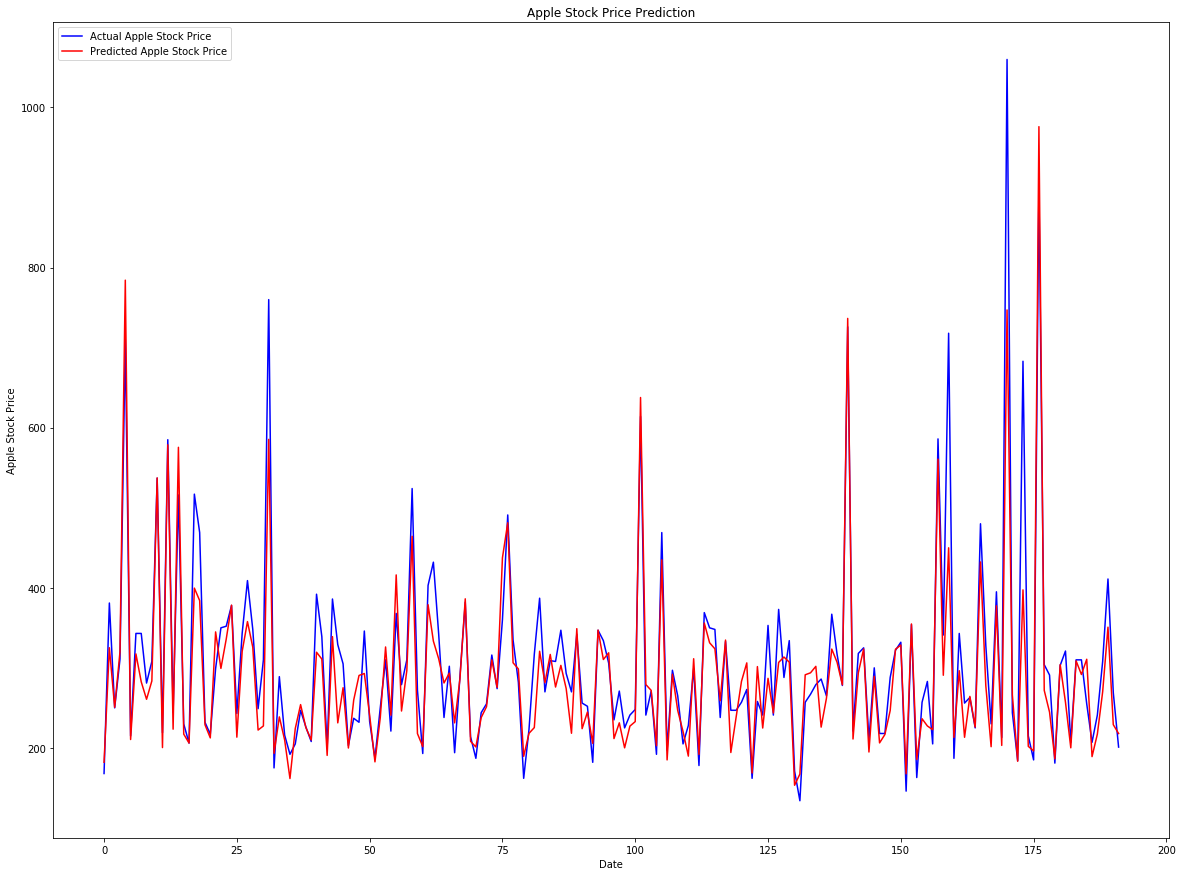

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot( scaler.inverse_transform(test_labels.reshape(-1, 1)), color='blue', label='Actual Apple Stock Price')
plt.plot(predictions, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# 5 days prediction

In [9]:
feature_set = []
labels = []

for i in range(60, len(df) - 4):
    feature_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i + 4, 0])
    
from sklearn.model_selection import train_test_split    

feature_set, labels = np.array(feature_set), np.array(labels)
train, test = train_test_split(labels, test_size=0.3, random_state=20)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1))

train_feature_set, test_feature_set, train_labels, test_labels =  train_test_split(feature_set, labels, test_size=0.3, random_state=20)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model_2 = Sequential()

model_2.add(LSTM(units=60, return_sequences=True, input_shape=(train_feature_set.shape[1], 1)))
model_2.add(Dropout(0.25))

model_2.add(LSTM(units=60, return_sequences=True))
model_2.add(Dropout(0.25))

model_2.add(LSTM(units=60, return_sequences=True))
model_2.add(Dropout(0.25))

model_2.add(LSTM(units=60))
model_2.add(Dropout(0.25))

model_2.add(Dense(units=1))

model_2.compile(optimizer='adam', loss='mean_squared_error')

In [18]:
model_2.fit(train_feature_set, train_labels, epochs=200, batch_size=32)

Train on 444 samples
Epoch 1/200
444/444 [==============================] - 0s 492us/sample - loss: 7.2768e-04
Epoch 2/200
444/444 [==============================] - 0s 470us/sample - loss: 7.5166e-04
Epoch 3/200
444/444 [==============================] - 0s 466us/sample - loss: 8.0173e-04
Epoch 4/200
444/444 [==============================] - 0s 490us/sample - loss: 9.0891e-04
Epoch 5/200
444/444 [==============================] - 0s 490us/sample - loss: 0.0012
Epoch 6/200
444/444 [==============================] - 0s 515us/sample - loss: 0.0012
Epoch 7/200
444/444 [==============================] - 0s 471us/sample - loss: 0.0010
Epoch 8/200
444/444 [==============================] - 0s 477us/sample - loss: 9.5034e-04
Epoch 9/200
444/444 [==============================] - 0s 477us/sample - loss: 9.2149e-04
Epoch 10/200
444/444 [==============================] - 0s 466us/sample - loss: 8.4010e-04
Epoch 11/200
444/444 [==============================] - 0s 477us/sample - loss: 9.3711e-04

444/444 [==============================] - 0s 481us/sample - loss: 7.4075e-04
Epoch 92/200
444/444 [==============================] - 0s 459us/sample - loss: 7.1634e-04
Epoch 93/200
444/444 [==============================] - 0s 470us/sample - loss: 7.5120e-04
Epoch 94/200
444/444 [==============================] - 0s 477us/sample - loss: 7.9741e-04
Epoch 95/200
444/444 [==============================] - 0s 473us/sample - loss: 7.5654e-04
Epoch 96/200
444/444 [==============================] - 0s 501us/sample - loss: 7.9941e-04
Epoch 97/200
444/444 [==============================] - 0s 477us/sample - loss: 8.8813e-04
Epoch 98/200
444/444 [==============================] - 0s 464us/sample - loss: 8.4904e-04
Epoch 99/200
444/444 [==============================] - 0s 470us/sample - loss: 6.6856e-04
Epoch 100/200
444/444 [==============================] - 0s 492us/sample - loss: 8.1832e-04
Epoch 101/200
444/444 [==============================] - 0s 484us/sample - loss: 7.9817e-04
Epoch 102/

444/444 [==============================] - 0s 468us/sample - loss: 7.1634e-04
Epoch 181/200
444/444 [==============================] - 0s 492us/sample - loss: 7.4780e-04
Epoch 182/200
444/444 [==============================] - 0s 468us/sample - loss: 7.1787e-04
Epoch 183/200
444/444 [==============================] - 0s 464us/sample - loss: 8.1982e-04
Epoch 184/200
444/444 [==============================] - 0s 468us/sample - loss: 7.9698e-04
Epoch 185/200
444/444 [==============================] - 0s 492us/sample - loss: 8.0945e-04
Epoch 186/200
444/444 [==============================] - 0s 514us/sample - loss: 8.0245e-04
Epoch 187/200
444/444 [==============================] - 0s 473us/sample - loss: 8.1988e-04
Epoch 188/200
444/444 [==============================] - 0s 477us/sample - loss: 7.9726e-04
Epoch 189/200
444/444 [==============================] - 0s 459us/sample - loss: 7.5001e-04
Epoch 190/200
444/444 [==============================] - 0s 479us/sample - loss: 6.7059e-04
Ep

In [19]:
predictions = model_2.predict(test_feature_set)
predictions = scaler.inverse_transform(predictions)

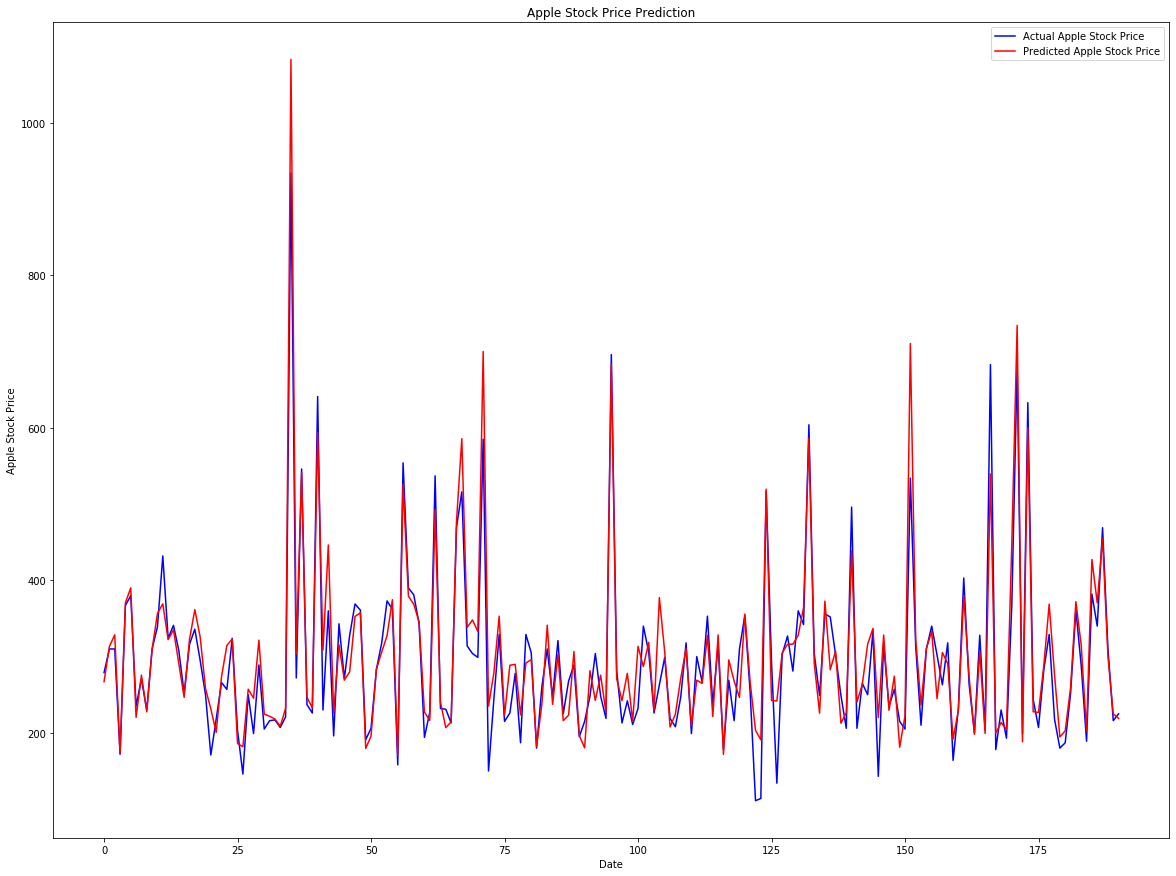

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
plt.plot( scaler.inverse_transform(test_labels.reshape(-1, 1)), color='blue', label='Actual Apple Stock Price')
plt.plot(predictions, color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [25]:
model_2.save('lstm_5days.h5')

In [26]:
from tensorflow.keras.models import load_model
m = load_model('lstm_5days.h5')

In [29]:
p = m.predict(test_feature_set)
p = scaler.inverse_transform(p)


# 7 days prediction

In [30]:
feature_set = []
labels = []

for i in range(60, len(df) - 6):
    feature_set.append(df_scaled[i-60:i, 0])
    labels.append(df_scaled[i + 6, 0])
    
from sklearn.model_selection import train_test_split    

feature_set, labels = np.array(feature_set), np.array(labels)
train, test = train_test_split(labels, test_size=0.3, random_state=20)
feature_set = np.reshape(feature_set, (feature_set.shape[0], feature_set.shape[1], 1))

train_feature_set, test_feature_set, train_labels, test_labels =  train_test_split(feature_set, labels, test_size=0.3, random_state=20)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

model_2 = Sequential()

model_2.add(LSTM(units=60, return_sequences=True, input_shape=(train_feature_set.shape[1], 1)))
model_2.add(Dropout(0.25))

model_2.add(LSTM(units=60, return_sequences=True))
model_2.add(Dropout(0.25))

model_2.add(LSTM(units=60, return_sequences=True))
model_2.add(Dropout(0.25))

model_2.add(LSTM(units=60))
model_2.add(Dropout(0.25))

model_2.add(Dense(units=1))

model_2.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
model_2.fit(train_feature_set, train_labels, epochs=600, batch_size=32)

Train on 443 samples
Epoch 1/600
443/443 [==============================] - 5s 12ms/sample - loss: 0.0242
Epoch 2/600
443/443 [==============================] - 0s 491us/sample - loss: 0.0111
Epoch 3/600
443/443 [==============================] - 0s 487us/sample - loss: 0.0118
Epoch 4/600
443/443 [==============================] - 0s 476us/sample - loss: 0.0110
Epoch 5/600
443/443 [==============================] - 0s 467us/sample - loss: 0.0114
Epoch 6/600
443/443 [==============================] - 0s 465us/sample - loss: 0.0106
Epoch 7/600
443/443 [==============================] - 0s 478us/sample - loss: 0.0110
Epoch 8/600
443/443 [==============================] - 0s 465us/sample - loss: 0.0109
Epoch 9/600
443/443 [==============================] - 0s 463us/sample - loss: 0.0110
Epoch 10/600
443/443 [==============================] - 0s 463us/sample - loss: 0.0112
Epoch 11/600
443/443 [==============================] - 0s 469us/sample - loss: 0.0110
Epoch 12/600
443/443 [==========

443/443 [==============================] - 0s 467us/sample - loss: 0.0095
Epoch 96/600
443/443 [==============================] - 0s 465us/sample - loss: 0.0096
Epoch 97/600
443/443 [==============================] - 0s 463us/sample - loss: 0.0100
Epoch 98/600
443/443 [==============================] - 0s 463us/sample - loss: 0.0099
Epoch 99/600
443/443 [==============================] - 0s 466us/sample - loss: 0.0096
Epoch 100/600
443/443 [==============================] - 0s 465us/sample - loss: 0.0179
Epoch 101/600
443/443 [==============================] - 0s 465us/sample - loss: 0.0104
Epoch 102/600
443/443 [==============================] - 0s 463us/sample - loss: 0.0101
Epoch 103/600
443/443 [==============================] - 0s 467us/sample - loss: 0.0102
Epoch 104/600
443/443 [==============================] - 0s 465us/sample - loss: 0.0099
Epoch 105/600
443/443 [==============================] - 0s 467us/sample - loss: 0.0101
Epoch 106/600
443/443 [===========================

443/443 [==============================] - 0s 471us/sample - loss: 0.0087
Epoch 189/600
443/443 [==============================] - 0s 465us/sample - loss: 0.0087
Epoch 190/600
443/443 [==============================] - 0s 467us/sample - loss: 0.0087
Epoch 191/600
443/443 [==============================] - 0s 462us/sample - loss: 0.0083
Epoch 192/600
443/443 [==============================] - 0s 468us/sample - loss: 0.0085
Epoch 193/600
443/443 [==============================] - 0s 476us/sample - loss: 0.0085
Epoch 194/600
443/443 [==============================] - 0s 468us/sample - loss: 0.0084
Epoch 195/600
443/443 [==============================] - 0s 484us/sample - loss: 0.0083
Epoch 196/600
443/443 [==============================] - 0s 482us/sample - loss: 0.0083
Epoch 197/600
443/443 [==============================] - 0s 491us/sample - loss: 0.0084
Epoch 198/600
443/443 [==============================] - 0s 487us/sample - loss: 0.0081
Epoch 199/600
443/443 [=======================

443/443 [==============================] - 0s 483us/sample - loss: 0.0077
Epoch 282/600
443/443 [==============================] - 0s 543us/sample - loss: 0.0071
Epoch 283/600
443/443 [==============================] - 0s 535us/sample - loss: 0.0076
Epoch 284/600
443/443 [==============================] - 0s 601us/sample - loss: 0.0066
Epoch 285/600
443/443 [==============================] - 0s 478us/sample - loss: 0.0075
Epoch 286/600
443/443 [==============================] - 0s 476us/sample - loss: 0.0077
Epoch 287/600
443/443 [==============================] - 0s 511us/sample - loss: 0.0061
Epoch 288/600
443/443 [==============================] - 0s 588us/sample - loss: 0.0083
Epoch 289/600
443/443 [==============================] - 0s 529us/sample - loss: 0.0072
Epoch 290/600
443/443 [==============================] - 0s 519us/sample - loss: 0.0065
Epoch 291/600
443/443 [==============================] - 0s 539us/sample - loss: 0.0109
Epoch 292/600
443/443 [=======================

443/443 [==============================] - 0s 487us/sample - loss: 0.0074
Epoch 375/600
443/443 [==============================] - 0s 473us/sample - loss: 0.0057
Epoch 376/600
443/443 [==============================] - 0s 470us/sample - loss: 0.0056
Epoch 377/600
443/443 [==============================] - 0s 458us/sample - loss: 0.0051
Epoch 378/600
443/443 [==============================] - 0s 465us/sample - loss: 0.0059
Epoch 379/600
443/443 [==============================] - 0s 482us/sample - loss: 0.0068
Epoch 380/600
443/443 [==============================] - 0s 485us/sample - loss: 0.0062
Epoch 381/600
443/443 [==============================] - 0s 489us/sample - loss: 0.0088
Epoch 382/600
443/443 [==============================] - 0s 484us/sample - loss: 0.0081
Epoch 383/600
443/443 [==============================] - 0s 492us/sample - loss: 0.0059
Epoch 384/600
443/443 [==============================] - 0s 482us/sample - loss: 0.0058
Epoch 385/600
443/443 [=======================

443/443 [==============================] - 0s 485us/sample - loss: 0.0017
Epoch 468/600
443/443 [==============================] - 0s 463us/sample - loss: 0.0017
Epoch 469/600
443/443 [==============================] - 0s 467us/sample - loss: 0.0016
Epoch 470/600
443/443 [==============================] - 0s 458us/sample - loss: 0.0016
Epoch 471/600
443/443 [==============================] - 0s 454us/sample - loss: 0.0019
Epoch 472/600
443/443 [==============================] - 0s 452us/sample - loss: 0.0019
Epoch 473/600
443/443 [==============================] - 0s 456us/sample - loss: 0.0022
Epoch 474/600
443/443 [==============================] - 0s 463us/sample - loss: 0.0024
Epoch 475/600
443/443 [==============================] - 0s 482us/sample - loss: 0.0022
Epoch 476/600
443/443 [==============================] - 0s 467us/sample - loss: 0.0026
Epoch 477/600
443/443 [==============================] - 0s 476us/sample - loss: 0.0025
Epoch 478/600
443/443 [=======================

443/443 [==============================] - 0s 491us/sample - loss: 0.0013
Epoch 561/600
443/443 [==============================] - 0s 480us/sample - loss: 0.0014
Epoch 562/600
443/443 [==============================] - 0s 469us/sample - loss: 0.0015
Epoch 563/600
443/443 [==============================] - 0s 487us/sample - loss: 0.0014
Epoch 564/600
443/443 [==============================] - 0s 485us/sample - loss: 0.0013
Epoch 565/600
443/443 [==============================] - 0s 458us/sample - loss: 0.0013
Epoch 566/600
443/443 [==============================] - 0s 458us/sample - loss: 0.0012
Epoch 567/600
443/443 [==============================] - 0s 456us/sample - loss: 0.0013
Epoch 568/600
443/443 [==============================] - 0s 463us/sample - loss: 0.0012
Epoch 569/600
443/443 [==============================] - 0s 482us/sample - loss: 0.0012
Epoch 570/600
443/443 [==============================] - 0s 480us/sample - loss: 0.0012
Epoch 571/600
443/443 [=======================

In [33]:
model_2.save('lstm_7days.h5')